In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error


Defining gradient and y-intercept,number of iterations



In [2]:
m = 0.5
c = 0.2
L = 0.0001
epoch =30
epoch_error_list = []
epoch_count_list = []

creating the dataset of 100 entries


In [3]:
noise=np.random.normal(1,15,100)

In [4]:
x=np.random.uniform(10,100,100)
y=m*x+c
Y=y+noise
N=float(len(x))

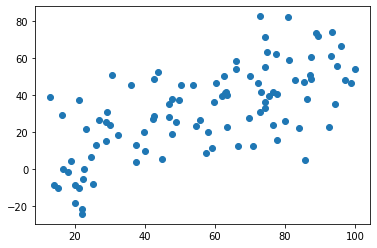

In [5]:
plt.scatter(x,Y)

Mean Square Error function for error computation

In [6]:
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

In [7]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    Y_hat = m*x+c
    
    
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    #print('error ',epoch_error)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)

    #minimize the error function by computing the partial derivatives
    D_m=(-2/N)*sum(x*(Y-Y_hat))
    #print('D_m ',D_m)
    D_c=(-2/N)*sum(Y-Y_hat)
    
    #Apply gradient descent formular to update both m and c into new values
    m=m-(L * D_m)
    #m=m-(2*X*())
    #print('new m is', m)
    c=c-(L * D_c)
  #you can print the final m and c after all iterations are done
  print("final m is: ",m," and final c is: ",c)
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_count_list,epoch_error_list

Invoking the gradient descent fit function


In [8]:

returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

final m is:  0.567299823762121  and final c is:  0.19738447971197484


Creating a line graph for the line of best fit and mean square error


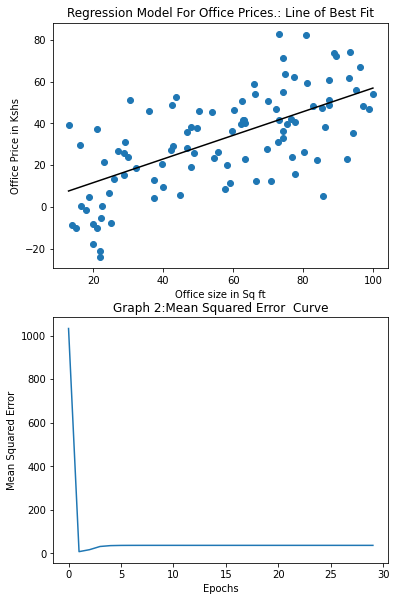

In [10]:

fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Office Price in Kshs")
ax1.set_title("Regression Model For Office Prices.: Line of Best Fit")
ax1.scatter(x,Y)

ax1.plot([min(x),max(x)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:Mean Squared Error  Curve")
ax2.set(xlabel="Epochs")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()